# Neural Networks & Deep Learning

In this notebook, we'll take a look at a type of algorithm that gets its inpiration from the way the human brain functions:  the _Neural Network_.  Let's see what the name means:

* `Neural` - The algorithm is composed of multiple small compuation units called _neurons_.  These are similiar in function (but not in structure) to neurons in the human brain.  A single neuron is composed of multiple inputs, a computation and a single output:

![image](https://miro.medium.com/max/414/1*mXTBLUhKbQoDVH5atkgksg.png)

The X's are the inputs, and the w's are the _weights_.  A neuron simply sums the product of each input and weight and applies a function to them so that the result is non-linear:

$$ y = f(\sum_{i=0}^{n} X_{i}w_{i}) $$

$X_{0}$ is typically set to 1 and is known as the _bias_.  A neuron learns by changing the values of its weights using an algorithm known as _backpropagation_.    

* `Network` - An individual neuron is interesting, but not super powerfull.  The strength of neural networks comes from the combination of multiple neurons into _layers_:  

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Multi-Layer_Neural_Network-Vector-Blank.svg/1200px-Multi-Layer_Neural_Network-Vector-Blank.svg.png)

Inputs go into the first layer.  Outputs from the first layer are used as inputs by the second layer, etc.  A _Deep Neural Network_ is just that - a neural network that has many layers.

There are two stages when training a neural network:
* `forward pass` - Feed input to the network, run it through the layers and get an input
* `backward pass` - Compare the predictions to the required outputs and calculate the error.  Change the weights in each layer according to the error.

The benefits of neural networks (or deep learning) is the fact that the model is capable of defining its own features.  But in order to do that, it may require a lot of data and compute power (i.e., GPUs and other forms of exotic devices).  

Neural networks can be used for both supervised and unsupervised training.

Let's see an example.

## Example
### The MNIST Dataset

The MNIST dataset is one of the first to be used with neural networks.  It contains images of handwritten digits that are 28x28 pixels.  We'll train a network that can convert an image to a digit.

In [106]:
%pylab inline
import pandas as pd


rcParams['figure.figsize'] = (20,7)



Populating the interactive namespace from numpy and matplotlib


In [107]:
from keras.datasets import mnist


(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print (y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


We already have training and test sets prepared for us.  Let's see some instances of the images:

6
3
1


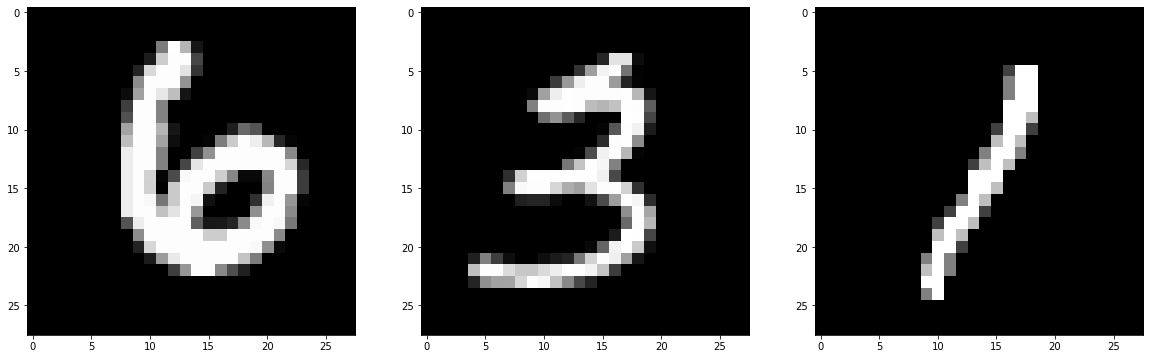

In [110]:
NUM_EXAMPLES = 3
image_indices = np.random.choice(len(X_train), NUM_EXAMPLES)

fig, axs = subplots(nrows=1, ncols=NUM_EXAMPLES)

for i in range(NUM_EXAMPLES):
    axs[i].imshow(X_train[image_indices[i]], cmap='gray')
    print(y_train[image_indices[i]])



Let's look at the distribution of labels:

<AxesSubplot:>

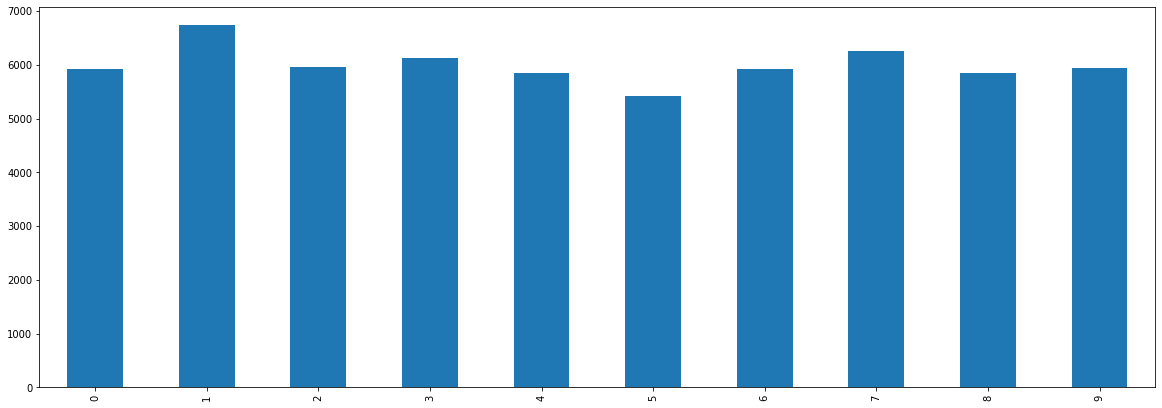

In [111]:
pd.Series(y_train).value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

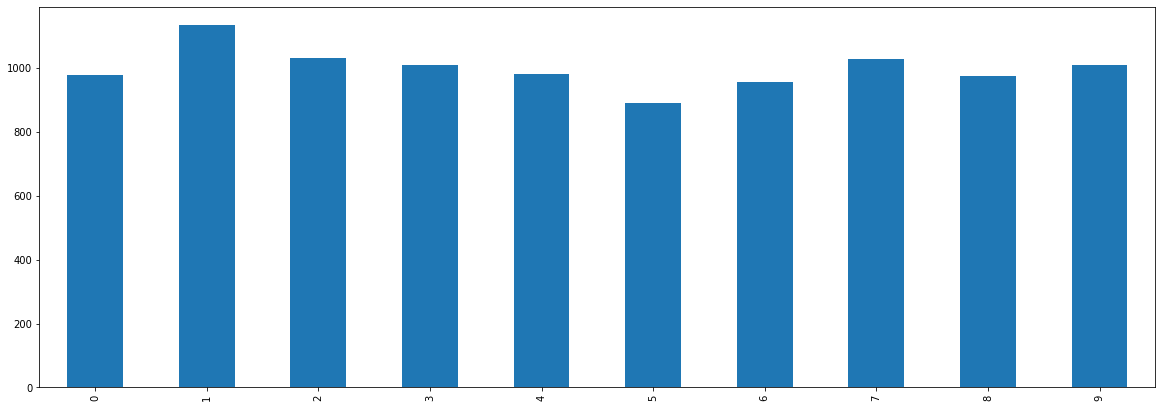

In [112]:
pd.Series(y_test).value_counts().sort_index().plot(kind='bar')

### Setting Up the Experiment

We'll be using a type of neural network that has a _fully connected_ architecture.  This means that all neurons in one layer are connected to all neurons in the next layer.  There are no connections between neurons in the same layer.  

The Python library we're using is called Keras, and is actually an API on top of another, very popular library called Tensorflow (by Google).

We begin by changing the image data into a 1-D vector of length 28x28 == 784.  This means that the model will not be aware of the spatial configuration of pixels.  We also make sure to convert RGB values between 0 and 255 to be between 0 and 1.

In [113]:


X_train = X_train.reshape(-1, 28*28) / 255
X_test  = X_test.reshape(-1,  28*28) / 255

We'll be using a 3-layer network:
* A layer with 30 neurons, connected to...
* ... A layer with 10 neurons, connected to...
* ... A layer with 10 neurons again.

Notice the `activation` attributes.  These are the additional functions we apply to the sum of products in a neuron.  They are meant to make sure that the layer is not linear.

`Relu` activation is usually used these days.  

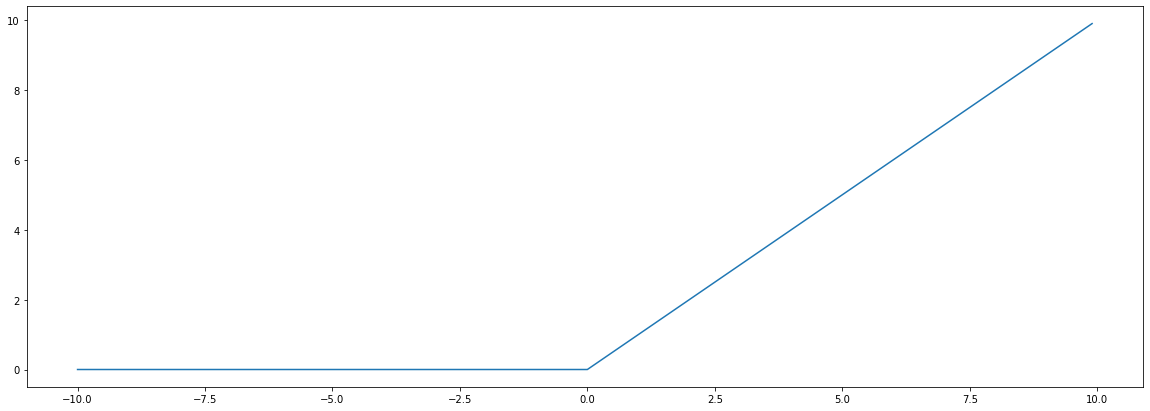

In [114]:
from keras.activations import relu

inputs = np.arange(-10, 10, 0.1)

plot(inputs, relu(inputs).numpy())


The `softmax` activation just does normalization - It makes sure that the sum of all neurons is equal to 1.  In this way, we can treat these outputs as probabilites.  The neuron with the largest probability wins.  

In [115]:
from keras.models import Sequential
from keras.layers import Dense

np.random.seed(80)


model = Sequential([
    Dense(30, input_shape=(784,), activation='relu'),
    Dense(10, activation='relu'),
    Dense(10,  activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
Total params: 23,970
Trainable params: 23,970
Non-trainable params: 0
_________________________________________________________________


We've constructed the model.  We can now run training.  The interesting parameters here are:
* `batch_size`       - How many instances to run in a single batch
* `epochs`           - How many times to run through all the data
* `validation_split` - How much of the data to use for validation 

In [116]:
history = model.fit(X_train, y_train,
         batch_size=512,
         epochs=10,
         validation_split=0.1)

Epoch 1/10
106/106 [==============================] - 1s 3ms/step - loss: 1.5517 - accuracy: 0.5167 - val_loss: 0.4943 - val_accuracy: 0.8880
Epoch 2/10
106/106 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.8728 - val_loss: 0.2932 - val_accuracy: 0.9217
Epoch 3/10
106/106 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.9052 - val_loss: 0.2438 - val_accuracy: 0.9350
Epoch 4/10
106/106 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.9206 - val_loss: 0.2153 - val_accuracy: 0.9435
Epoch 5/10
106/106 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.9295 - val_loss: 0.2046 - val_accuracy: 0.9467
Epoch 6/10
106/106 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9328 - val_loss: 0.1899 - val_accuracy: 0.9497
Epoch 7/10
106/106 [==============================] - 0s 3ms/step - loss: 0.2203 - accuracy: 0.9374 - val_loss: 0.1748 - val_accuracy: 0.9520
Epoch 

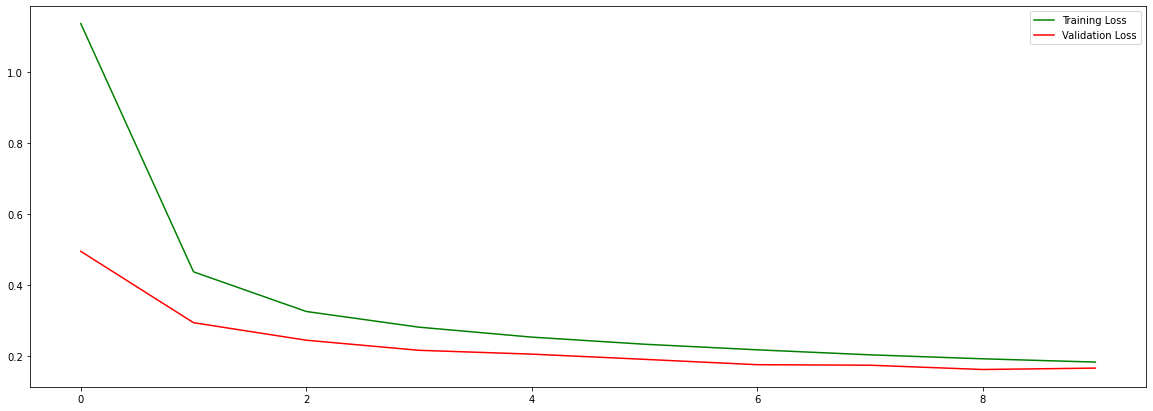

In [117]:
plot(history.history['loss'], 'green', label='Training Loss')
plot(history.history['val_loss'], 'red', label="Validation Loss")
legend()

The model seems to converge nicely with little-to-none overfitting.  Let's now look at the results of the test set:

7
9
3


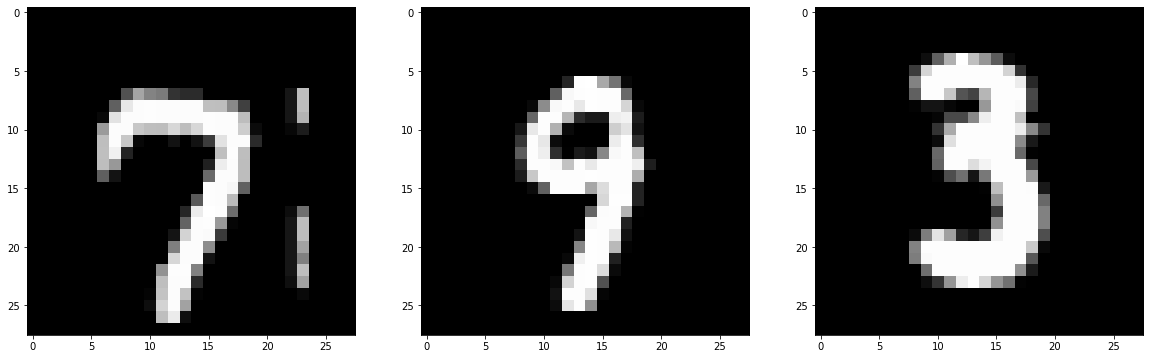

In [128]:
image_indices = np.random.choice(len(X_test), NUM_EXAMPLES)

fig, axs = subplots(nrows=1, ncols=NUM_EXAMPLES)

for i in range(NUM_EXAMPLES):
    axs[i].imshow(X_test[image_indices[i]].reshape(28,28), cmap='gray')
    data = X_test[image_indices[i]].reshape(1,-1)
    print(np.argmax(model.predict(data)))

In [129]:
model.evaluate(X_test, y_test, batch_size=512)

20/20 [==============================] - 0s 988us/step - loss: 0.1958 - accuracy: 0.9421


[0.19583000242710114, 0.9420999884605408]

Looks very similiar to our training.  Since this is a classification problem let's look at some additional metrics:

In [130]:
from sklearn.metrics import classification_report

predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis=-1)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       980
           1       0.98      0.97      0.98      1135
           2       0.97      0.92      0.94      1032
           3       0.90      0.95      0.93      1010
           4       0.95      0.94      0.94       982
           5       0.96      0.91      0.93       892
           6       0.95      0.96      0.96       958
           7       0.97      0.91      0.94      1028
           8       0.89      0.94      0.92       974
           9       0.88      0.94      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Let's try a smaller model:

In [131]:
np.random.seed(80)


model = Sequential([
    Dense(3, input_shape=(784,), activation='relu'),
    Dense(5, activation='relu'),
    Dense(10,  activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


model.summary()

history = model.fit(X_train, y_train,
         batch_size=512,
         epochs=10,
         validation_split=0.1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 3)                 2355      
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 20        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                60        
Total params: 2,435
Trainable params: 2,435
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
106/106 [==============================] - 1s 3ms/step - loss: 2.1578 - accuracy: 0.1899 - val_loss: 1.8688 - val_accuracy: 0.3585
Epoch 2/10
106/106 [==============================] - 0s 2ms/step - loss: 1.8163 - accuracy: 0.3578 - val_loss: 1.6776 - val_accuracy: 0.3828
Epoch 3/10
106/106 [==============================] - 0s 2ms/step - loss: 1.6490 - accuracy: 0.389

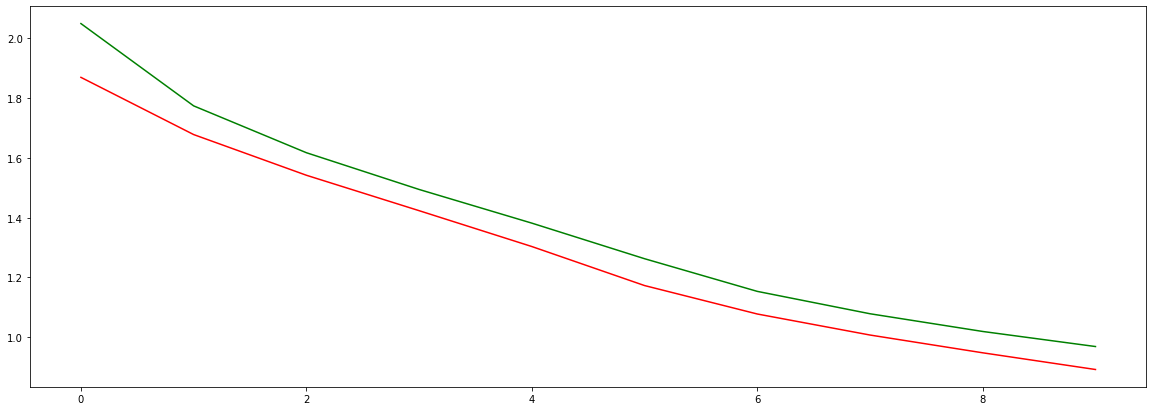

In [132]:
plot(history.history['loss'], 'green')
plot(history.history['val_loss'], 'red')

In [133]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 420us/step - loss: 0.9437 - accuracy: 0.6762


[0.9436660408973694, 0.6761999726295471]

8
7
7


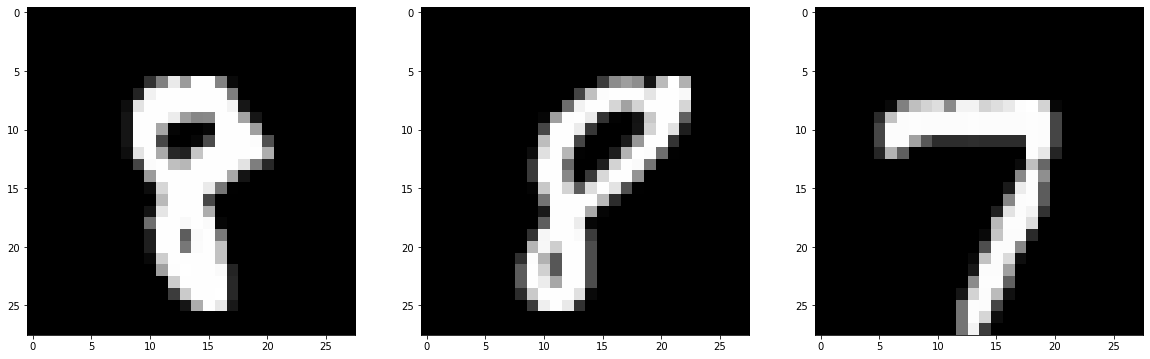

In [142]:
image_indices = np.random.choice(len(X_test), NUM_EXAMPLES)

fig, axs = subplots(nrows=1, ncols=NUM_EXAMPLES)

for i in range(NUM_EXAMPLES):
    axs[i].imshow(X_test[image_indices[i]].reshape(28,28), cmap='gray')
    data = X_test[image_indices[i]].reshape(1,-1)
    print(np.argmax(model.predict(data)))

In [143]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions,axis=-1)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.57      0.92      0.71       980
           1       0.81      0.96      0.88      1135
           2       0.69      0.63      0.66      1032
           3       0.53      0.30      0.38      1010
           4       0.77      0.83      0.80       982
           5       0.46      0.09      0.14       892
           6       0.79      0.84      0.81       958
           7       0.59      0.85      0.69      1028
           8       0.56      0.49      0.52       974
           9       0.78      0.76      0.77      1009

    accuracy                           0.68     10000
   macro avg       0.66      0.67      0.64     10000
weighted avg       0.66      0.68      0.65     10000



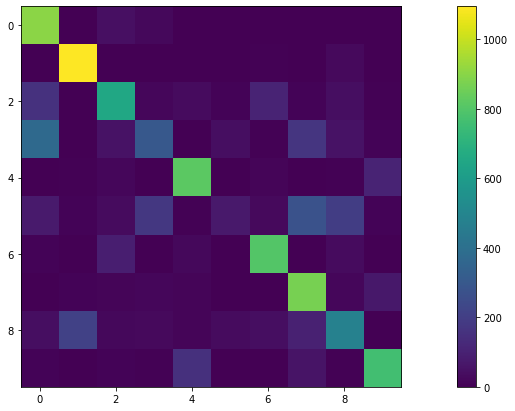

In [144]:
from sklearn.metrics import confusion_matrix


imshow(confusion_matrix(y_test, predictions))
colorbar()

Looks like there are specific areas which are problematic for a smaller model - for instance 8 vs 0.

## Examples of AI

[This Person does not exist](https://thispersondoesnotexist.com/)

[GauGan](http://nvidia-research-mingyuliu.com/gaugan/)